In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
df = pd.read_csv(r"C:\Users\AADITI\Downloads\archive (3)\College_Admission.csv")
df


,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no
3,250.99,18,male,ews,meghalaya,arts,cet,179,52.49,2,0.174,admitted,no
4,250.99,18,male,sc,rajasthan,engineering,jee,295,92.48,7,0.634,admitted,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24750.01,18,female,obc,uttar pradesh,law,none,0,82.67,2,0.273,rejected,no
24996,24750.01,20,other,ews,andhra pradesh,management,none,0,60.66,10,0.258,rejected,no
24997,24750.01,17,male,obc,manipur,pharmacy,cet,195,91.87,6,0.544,rejected,no
24998,24750.01,19,male,ews,andhra pradesh,management,cet,66,50.44,9,0.209,rejected,no


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               25000 non-null  float64
 1   age                      25000 non-null  int64  
 2   gender                   25000 non-null  object 
 3   category                 25000 non-null  object 
 4   state                    25000 non-null  object 
 5   preferred_stream         25000 non-null  object 
 6   entrance_exam            25000 non-null  object 
 7   entrance_score           25000 non-null  int64  
 8   board_percentage         25000 non-null  float64
 9   extracurricular_score    25000 non-null  int64  
 10  admission_probability    25000 non-null  float64
 11  admission_status         25000 non-null  object 
 12  scholarship_eligibility  25000 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.5+ MB


In [8]:
df.to_csv("College_Admission.csv", index=False)


In [44]:
df.describe()


,student_id,age,entrance_score,board_percentage,extracurricular_score,admission_probability
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,18.492440,77.879760,75.028014,4.990920,0.323997
std,7212.732314,1.116205,120.356125,14.438767,3.158942,0.142427
min,250.990000,17.000000,0.000000,50.440000,0.000000,0.041990
25%,6250.750000,17.000000,0.000000,62.550000,2.000000,0.219000
50%,12500.500000,18.000000,20.000000,75.070000,5.000000,0.319000
75%,18750.250000,19.000000,126.000000,87.640000,8.000000,0.419000
max,24750.010000,20.000000,634.000000,99.530000,10.000000,0.731010


In [45]:
df.isnull().sum()


student_id                 0
age                        0
gender                     0
category                   0
state                      0
preferred_stream           0
entrance_exam              0
entrance_score             0
board_percentage           0
extracurricular_score      0
admission_probability      0
admission_status           0
scholarship_eligibility    0
dtype: int64

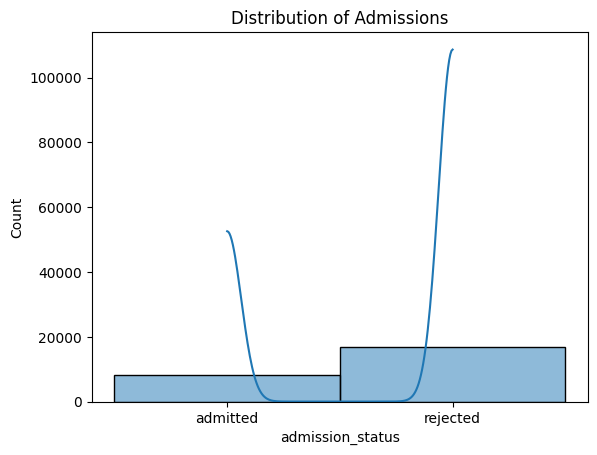

In [46]:
sns.histplot(df['admission_status'], kde=True)
plt.title("Distribution of Admissions")
plt.show()


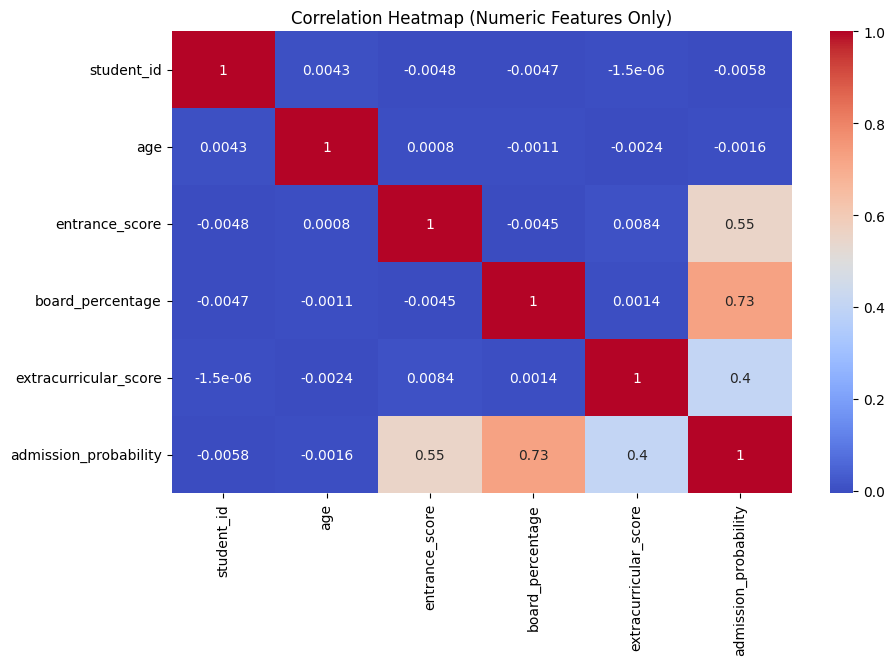

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [49]:
numeric_df.columns


Index(['student_id', 'age', 'entrance_score', 'board_percentage',
       'extracurricular_score', 'admission_probability'],
      dtype='object')

In [51]:
df.dtypes


student_id                 float64
age                          int64
gender                      object
category                    object
state                       object
preferred_stream            object
entrance_exam               object
entrance_score               int64
board_percentage           float64
extracurricular_score        int64
admission_probability      float64
admission_status            object
scholarship_eligibility     object
dtype: object

In [52]:
le = LabelEncoder()
df['preferred_stream'] = le.fit_transform(df['preferred_stream'])
df['state'] = le.fit_transform(df['state'])


In [55]:
# Create performance index (similar role to affordability score)
# Create merit score (equivalent to affordability index)
df['Merit_Score'] = (
    df['entrance_score'] +
    df['board_percentage'] +
    df['extracurricular_score']
) / 3



In [56]:
# Entrance score category (equivalent to university size category)
df['Entrance_Score_Category'] = pd.cut(
    df['entrance_score'],
    bins=[0, 40, 70, 100],
    labels=['Low', 'Medium', 'High']
)


In [76]:
X = df[['age', 'entrance_score', 'board_percentage', 'extracurricular_score']]
y = df['admission_probability']



In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [79]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [80]:
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: 0.9952186813747376
Random Forest R2: 0.9991136615708129


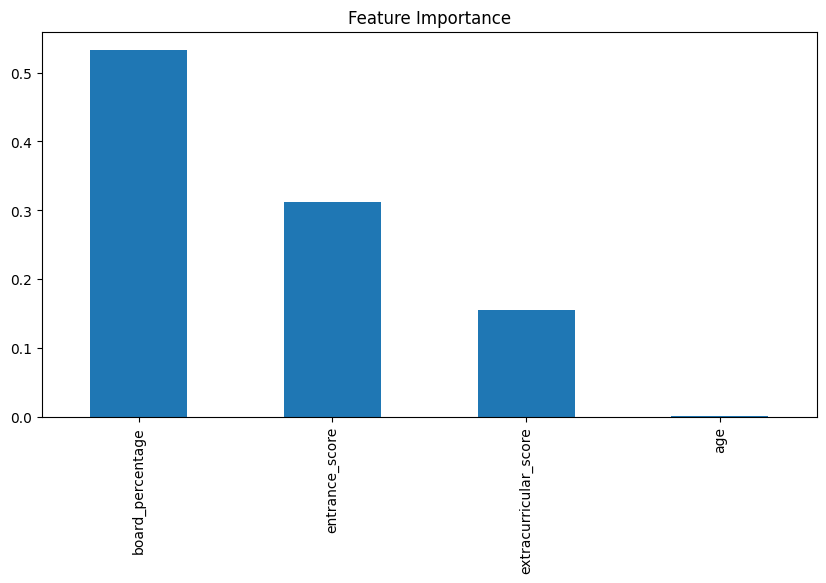

In [81]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [ ]:
import streamlit as st

st.title("University Admissions Prediction Dashboard")

program = st.selectbox("Select Program Type", df['Program_Type'].unique())

filtered_df = df[df['Program_Type'] == program]

st.bar_chart(filtered_df.groupby('Location')['Number_of_Admissions'].mean())


In [64]:
df.isnull().sum()


student_id                 0
age                        0
gender                     0
category                   0
state                      0
preferred_stream           0
entrance_exam              0
entrance_score             0
board_percentage           0
extracurricular_score      0
admission_probability      0
admission_status           0
scholarship_eligibility    0
Merit_Score                0
Entrance_Score_Category    0
dtype: int64

In [63]:
# Numerical features
# Fill missing values for the categorical column 'Entrance_Score_Category' with its mode
df['Entrance_Score_Category'].fillna(df['Entrance_Score_Category'].mode()[0], inplace=True)



C:\Users\AADITI\AppData\Local\Temp\ipykernel_2916\645023667.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Entrance_Score_Category'].fillna(df['Entrance_Score_Category'].mode()[0], inplace=True)


In [85]:
import streamlit as st
import pandas as pd

# Title
st.title("Student Admission Prediction Dashboard")

# Dropdown to select preferred stream
stream = st.selectbox(
    "Select Preferred Stream",
    df['preferred_stream'].unique()
)

# Filter data based on selected stream
filtered_df = df[df['preferred_stream'] == stream]

# Bar chart: Average admission probability by state
st.subheader("Average Admission Probability by State")
st.bar_chart(
    filtered_df.groupby('state')['admission_probability'].mean()
)



2026-01-16 17:50:58.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:50:58.036 Session state does not function when running a script without `streamlit run`
2026-01-16 17:50

DeltaGenerator()

In [86]:
st.subheader("Admission Status Distribution")
st.bar_chart(filtered_df['admission_status'].value_counts())


2026-01-16 17:51:47.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:51:47.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:51:47.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:51:47.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:51:47.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:51:47.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [87]:
st.subheader("Average Merit Score by Stream")
st.bar_chart(
    df.groupby('preferred_stream')['Merit_Score'].mean()
)


2026-01-16 17:52:06.034 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:52:06.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:52:06.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:52:06.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:52:06.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-16 17:52:06.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [88]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
